<img src="images/cads-logo.png" style="height: 100px;" align=left> <img src="images/sklearn-logo.png" style="height: 100px;" align=right>
# Machine Learning

# Day4: Clustering
**Clustering** is the task of partitioning the dataset into groups called clusters. The goal is to split up the data in such a way that points within a single cluster are very similar and points in different clusters are different. Similarly to classification algorithms, clustering algorithms assign (or predict) a number to each data point, indicating which cluster a particular point belongs to. The only difference here is that: The cluster "number" is not indicative of anything meaningful, or labels such as iris flower species, or breast cancer diagnosis or celebrity faces. The numbers only indicate groupings.

![](https://www.analyticsvidhya.com/wp-content/uploads/2016/11/clustering.png)

How is this useful? Well, clustering can discover the patterns that exist in your data in an exploratory setting. In terms of evaluation, there exists a few quantitative methods (which we will look later), but they mostly made assumptions that are not applicable in some applications. As such, the "goodnesss" of clustering is often hard to assess.

## Table of Contents

- 3 popular clustering algorithms
    - K-Means Clustering
        - Exercise 1
        - Elbow Method
        - Example: k-means on digits
        - Failure cases of k-means
        - Exercise: K-means on the Iris dataset
    - Agglomerative Clustering
        - Hierarchical clustering and dendrogram
            - Dendrogram Truncation
            - Interpreting the dendrogram further
            - Exercise 2
        - Cophenetic Correlation Coefficient
        - Exercise 3
        - Exercise 4
    - DBSCAN
- Comparing and Evaluating Clustering Algorithms
    - Clustering Evaluation Metrics (True label known)
        - Adjusted Rand Index
        - v_measure
    - Clustering Evaluation Metrics (True label unknown)
        - Silhouette Coefficient
        - Davies-Bouldin Index
- Summary
- Exercise 5
- Exercise 6
- Exercise 7

 # 3 popular clustering algorithms

 - **K-Means Clustering**
 -  **Agglomerative Hierarchical Clustering**
 -  **Density-Based Spatial Clustering of Applications with Noise (DBSCAN)**

We begin with the standard imports:

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/ADCP Learning Material-Raja Zareef/Copy of Unsupervised Machine Learning/Clustering/ML_Datastar-Clustering-SC')
import plottinglib as plotlib

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

## K-Means Clustering

*K-Means clustering* is one of the simplest and most commonly used clustering algorithms.
It tries to find cluster centers that are representative of certain regions of the
data. The algorithm alternates between two steps: assigning each data point to the
closest cluster center, and then setting each cluster center as the mean of the data
points that are assigned to it. The algorithm iterates until the assignment of
instances to clusters no longer changes the cluster means by much. The following figure shows a simple step-by-step example of clustering.

![](images/kmeans-steps.png)

Cluster centers are shown as triangles, while data points are shown as circles. Colors indicate cluster membership. We specified that we are looking for three clusters, so the algorithm was initialized by declaring three data points *randomly* as cluster centers (see "Initialization"). Then the iterative algorithm starts.
- First, each data point is assigned to the cluster center it is closest to (see "Assign Points (1)").
- Next, the cluster centers are updated to be the mean of the assigned points (see "Recompute Centers (1)").

Then the process is repeated two more times. After the third iteration, the assignment of points to cluster centers remained unchanged, so the algorithm stops.

After clustering is performed, given new data points, k-means will assign each point to the closest cluster center. This process is sometimes known as "quantization" or "vector quantization".

Applying k-means with `scikit-learn` is quite simple. We shall start off with some synthetic data before venturing into more realistic data. Similar to the classification estimators, the `KMeans` class is instantiated, and the number of clusters we are looking for are set. Then we call the `fit` method to perform the fitting to the data.

In [ ]:
from sklearn.cluster import KMeans

# generate synthetic two-dimensional data
X, y = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)

# build the clustering model
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

KMeans(n_clusters=4)

During the algorithm, each training data point in X is assigned a cluster label. You can find these labels in the **kmeans.labels_** attribute.

In [ ]:
print("Cluster memberships:\n{}".format(kmeans.labels_))

Cluster memberships:
[0 1 2 1 0 0 3 2 1 1 3 1 2 1 0 2 2 0 3 3 0 0 2 3 3 2 0 2 3 2 1 1 2 1 1 1 1
 1 3 0 2 3 2 2 3 3 1 3 1 0 3 0 1 0 0 3 1 3 1 0 1 2 1 3 3 3 1 0 1 3 2 3 1 3
 3 1 3 2 0 1 0 2 0 0 1 2 0 2 1 1 2 0 1 3 3 2 0 0 2 3 1 0 1 0 2 0 0 2 1 2 3
 3 0 1 0 2 1 0 0 2 3 0 3 0 0 0 0 3 0 3 1 3 3 0 1 3 3 1 2 1 1 3 2 3 2 3 1 2
 1 1 1 2 1 2 0 3 1 3 0 2 1 2 2 0 2 3 3 2 0 2 2 1 0 2 3 1 0 0 2 3 0 2 3 3 2
 2 2 2 0 1 2 3 2 2 3 3 3 2 3 1 2 3 0 3 2 1 3 1 2 1 2 3 2 2 1 3 3 0 0 2 1 0
 0 3 0 3 2 1 1 2 2 1 2 0 3 2 0 3 1 3 0 2 0 1 1 1 1 3 3 1 2 3 0 2 3 3 3 0 0
 1 2 2 3 0 1 3 2 1 2 0 0 3 3 2 0 0 0 2 1 1 0 0 2 0 0 0 1 3 1 2 0 0 1 1 1 0
 0 2 1 3]


In [ ]:
kmeans.cluster_centers_

array([[ 1.98258281,  0.86771314],
       [-1.37324398,  7.75368871],
       [ 0.94973532,  4.41906906],
       [-1.58438467,  2.83081263]])

In [ ]:
# The inertia is the sum of squared distances of samples to their closest cluster center.
kmeans.inertia_

212.00599621083475

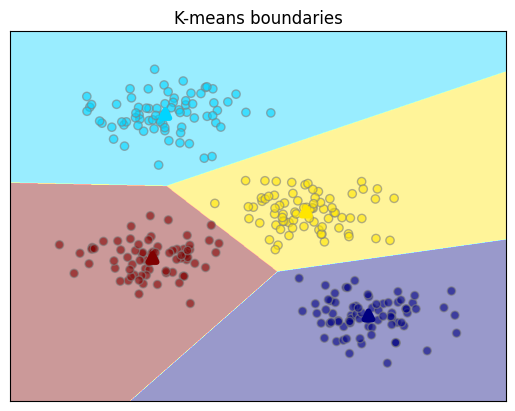

In [ ]:
# plot data
colormap='jet'
plotlib.plot_estimator_boundaries(kmeans, X, y, cm=colormap, alpha=0.4, title='K-means boundaries')
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, marker='o', cmap=colormap, alpha=0.6, edgecolors='grey')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c=[0, 1, 2, 3], marker='^',
            linewidths=4, cmap=colormap)
plt.show()

You can also assign cluster labels to new points, using the predict method. Each new point is assigned to the closest cluster center when predicting.

Text(0, 0.5, 'Feature 2')

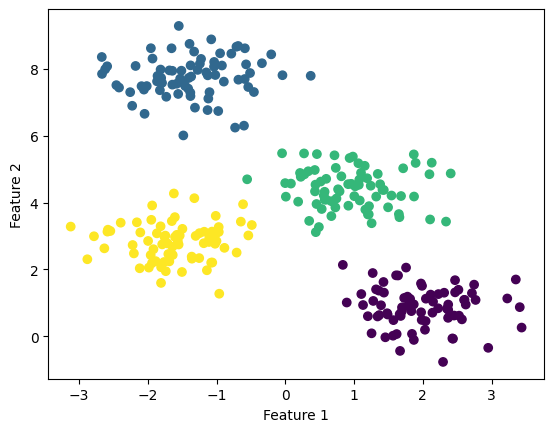

In [ ]:
# if we plot a scatter plot with the X and the label from KMean,
# we get similar to the earlier plot with c=y

plt.scatter(X[:,0], X[:,1], c=kmeans.labels_)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

In [ ]:
print(kmeans.predict([[-10,-5]]))

[3]


Obviously, this makes more sense if we have some new data points that we want to assign them to clusters:

In [ ]:
# create some random data points that are roughly in the range
new_data = np.random.randn(10, 2)*5
print(new_data)

[[ 1.57369307 -6.73406543]
 [-0.12828318  7.55864068]
 [ 1.98125732 -2.25252973]
 [ 2.29134131 -1.52121928]
 [-1.4778131  -7.25764744]
 [-4.59317517  7.75326372]
 [-6.64883355 -6.05227264]
 [-4.58265226 -4.2146678 ]
 [-9.57522802 -6.51760519]
 [ 0.28037891  2.08736663]]


In [ ]:
print(kmeans.predict(new_data))

[0 1 0 0 0 1 3 3 3 3]


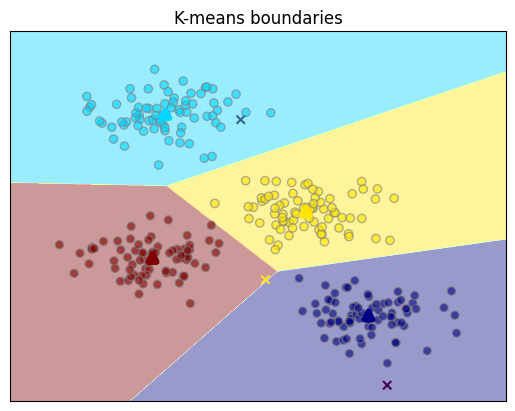

In [ ]:
# given the boundary that KMean made earlier,
# the predicted clusters for the new data is shown here.

colormap='jet'
plotlib.plot_estimator_boundaries(kmeans, X, y,
                                  cm=colormap, alpha=0.4,
                                  title='K-means boundaries')

plt.scatter(X[:, 0], X[:, 1],
            c=kmeans.labels_, marker='o',
            cmap=colormap, alpha=0.6,
            edgecolors='grey')

plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            c=[0, 1, 2, 3], marker='^',
            linewidths=4, cmap=colormap)

plt.scatter(new_data[:,0],
            new_data[:,1],
            c=kmeans.predict(new_data),
            marker='x')
plt.show()

In k-means clustering, running the algorithm again might result in a different clusters (usually when *k* is large), or even different numbering of clusters, because of the random nature of the initialization of cluster centers, also known as "seeds".

## <font color=Green><b>Exercise 1:</b></font>
Try with lesser or more number of clusters (k). Observe the effect of k-means clustering with different k values.

In [ ]:
# Your code here ; try different k then check inertia

### Using the elbow method to find the optimal number of clusters
The Elbow Method heuristic is probably the most popular technique of finding the optimal number of clusters due to its simple explanation (amount of variance explained by number of clusters) coupled with a visual check. Basically, it tries to find the clustering step where the acceleration of distance growth is the biggest.

The inertia is the sum of squared distances of samples to their closest cluster center.
$$\sum_{i=1}^{k}{\sum_{x \in C_i}{(x-c_i)^2}}.$$ Where $x=(x_1,x_2, ..., x_n)$ is a datapoint in cluster $C_i$ with centriod $c_i=(c_{i1}, c_{i2}, ..., c_{in})$.


More information is [here](http://scikit-learn.org/stable/modules/clustering.html#k-means).

In [ ]:
print('Distortion: %.2f' % kmeans.inertia_)

Distortion: 212.01


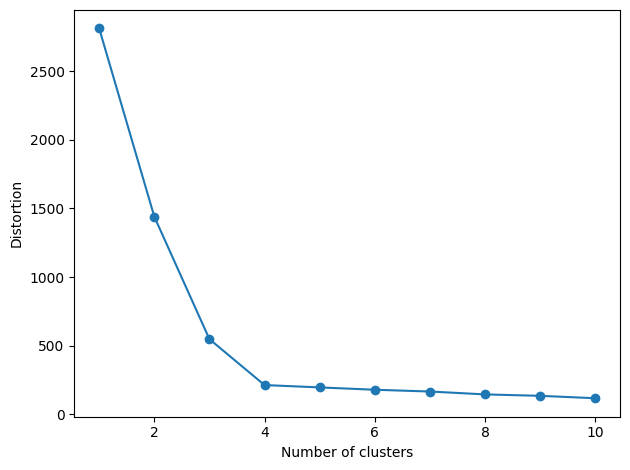

In [ ]:
distortions = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,
                random_state=0)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

The good news is that the k-means algorithm (at least in this simple case) assigns the points to clusters very similarly to how we might assign them by eye. But you might wonder how this algorithm finds these clusters so quickly! After all, the number of possible combinations of cluster assignments is exponential in the number of data points—an exhaustive search would be very, very costly.

#### Is the number of clusters suggeted by elbow, acceptable?

- One known issue of "elbow" is the way it is defined:
    - you need at least a right and a left point, which implies that this method will never be able to tell you that all your data is in one single cluster only.
- If your data has many clusters of different variances, then this method might get the optimal number of clusters a little wrong (either 1 more or 1 less usually).

### Example: k-means on digits

To start, let's take a look at applying *k-means* on the same simple digits data. Here we will attempt to use *k-means* to try to identify similar digits *without using the original label information*; this might be similar to a first step in extracting meaning from a new dataset about which you don't have any *a priori* label information.

We will start by loading the digits and then finding the ``KMeans`` clusters.
Recall that the digits consist of 1,797 samples with 64 features, where each of the 64 features is the brightness of one pixel in an 8×8 image:

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

The clustering can be performed as we did before:

In [ ]:
digit_km = KMeans(n_clusters=10, random_state=0)
clusters = digit_km.fit_predict(digits.data)
digit_km.cluster_centers_.shape

(10, 64)

The result is 10 clusters in 64 dimensions.
Notice that the cluster centers themselves are 64-dimensional points, and can themselves be interpreted as the "typical" digit within the cluster.
Let's see what these cluster centers look like:

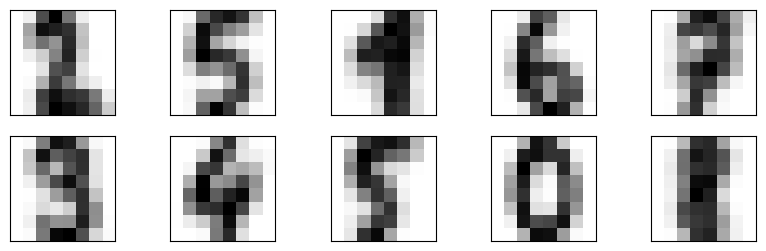

In [ ]:
fig, ax = plt.subplots(2, 5, figsize=(10, 3))
centers = digit_km.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

We see that *even without the labels*, ``KMeans`` is able to find clusters whose centers are recognizable digits, with perhaps some exceptions.

Because *k*-means knows nothing about the identity of the cluster, the 0–9 labels may be permuted.
We can fix this by matching each learned cluster label with the true labels found in them:

In [ ]:
digits.target[clusters==0]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       8, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 8, 2, 2, 2, 2, 2, 2, 2, 8, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 8, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2])

### Failure cases of k-means

- Even if you know the "right" number of clusters for a given dataset, k-means might not always be able to recover them. (Example 1)
- k-means also assumes that all clusters have the same "diameter" in some sense; it always draws the boundary between clusters to be exactly in the middle between the cluster centers. That can sometimes lead to surprising results. (Example 2)
- Each cluster is a convex shape in k-means method. As a result of this, k-means can only capture relatively simple shapes. (Example 3)

### Example 1:

In [ ]:
# generate some random cluster data
X_varied, y_varied = make_blobs(n_samples=200,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=170)

Text(0, 0.5, 'Feature 2')

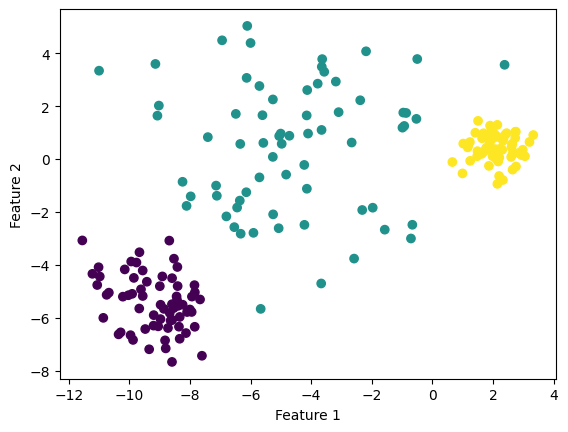

In [ ]:
plt.scatter(X_varied[:,0], X_varied[:,1], c=y_varied)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

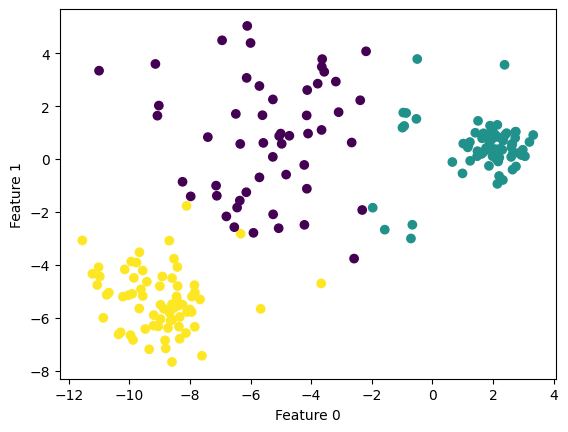

In [ ]:
# cluster the data into three clusters
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)

# plot the cluster assignments and cluster centers
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred, cmap='viridis')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

In [ ]:
# Draw the same result by usung `model.labels_`

# Your code here

One might have expected the dense region in the lower left to be the first cluster, the dense region in the upper right to be the second, and the less dense region in the center to be the third. Instead, both denser clusters have some points that are far
away from all the other points in these clusters that are near their centers. k-means also assumes that all directions are equally important for each cluster.

### Example 2:

In [ ]:
# generate some random cluster data
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

# transform the data to be stretched
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

Text(0, 0.5, 'Feature 2')

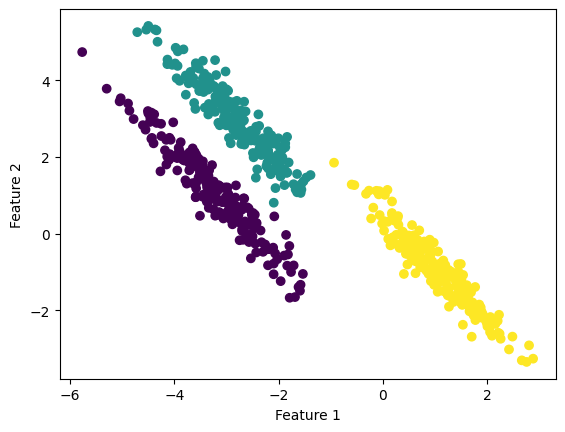

In [ ]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

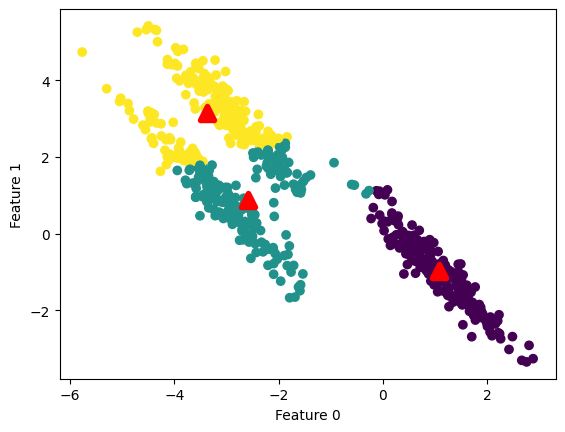

In [ ]:
# cluster the data into three clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# plot the cluster assignments and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1], marker='^',
            c='red', s=100, linewidth=4, cmap='viridis')

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

Here, we have a two-dimensional dataset where there are three clearly separated parts in the data. However, these groups are stretched in a diagonal way. As k-means only considers the distance to the nearest cluster center and that clusters are often circular in shape, it can't handle this kind of data.

### Example 3:
k-means also performs poorly if the clusters have more complex shapes, like the `two_moons` data we have encountered before

In [ ]:
# generate synthetic two_moons data (with less noise this time)
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

Text(0, 0.5, 'Feature 2')

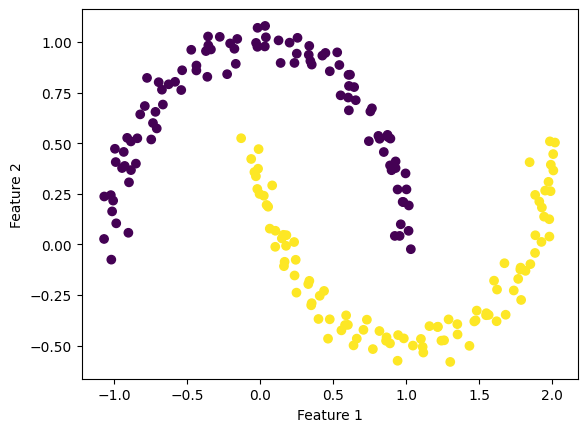

In [ ]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

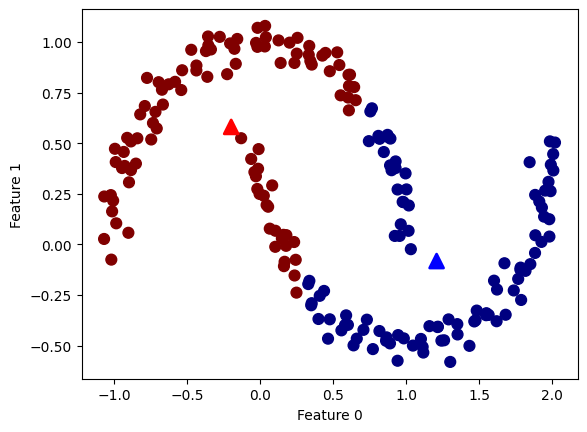

In [ ]:
# cluster the data into two clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# plot the cluster assignments and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='jet', s=60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='^', c=['blue', 'red'], s=100, linewidth=2)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

Opps, this doesn't look right. We have hoped that the clustering algorithm can discover the two half-moon shapes, but looks like it failed.

## <font color=Green><b>Exercise: K-means on the Iris dataset</b></font>

- Load the iris data set using sklearn datasets
- Set X to contain the feature matrix
- Set y to contain the target vector
- Scale data with StandardScaler and MinMaxScaler
- Fit a Kmeans Clustering model with 3 clusters for scaling and unscaling data
- Do we really see three flower groups here or should there be more/less? Plot using the elbow method
- Does scaling the data improve the performance of your clustering? (show with plotting)

In [ ]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
# Your code here
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [ ]:
X_S = StandardScaler().fit_transform(X)
X_M = MinMaxScaler(feature_range =(0,1)).fit_transform(X)

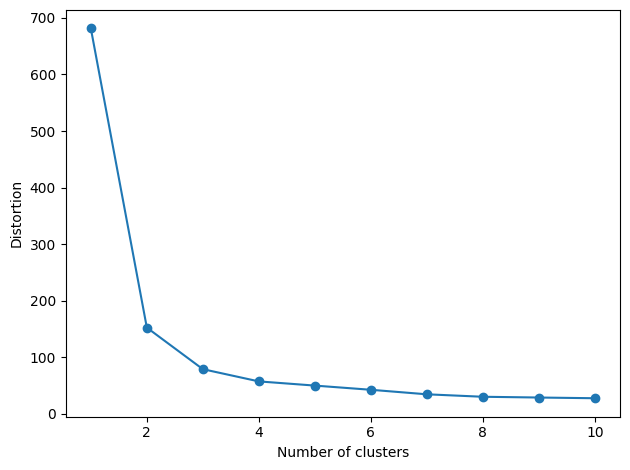

In [ ]:
distortions = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,
                random_state=0)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

In [ ]:
model = KMeans(n_clusters=4)
clusters = model.fit_predict(X)
clusters_S = model.fit_predict(X_S)
clusters_M = model.fit_predict(X_M)

Text(0.5, 1.0, 'IRIS Clustering KMeans, not scaled')

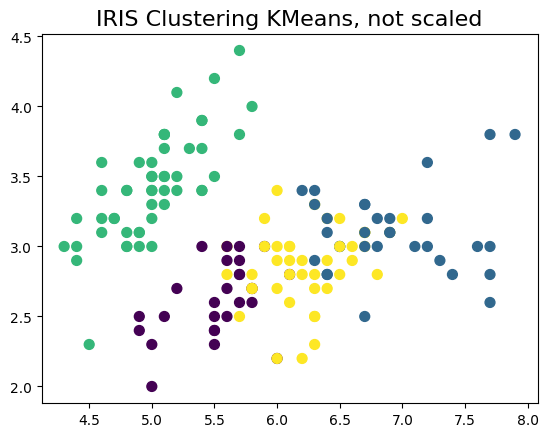

In [ ]:
plt.scatter(X[:,0],X[:,1], c=clusters, s=50, cmap='viridis')

plt.title('IRIS Clustering KMeans, not scaled', fontsize=16)

Text(0.5, 1.0, 'IRIS Clustering KMeans, Standard scaled')

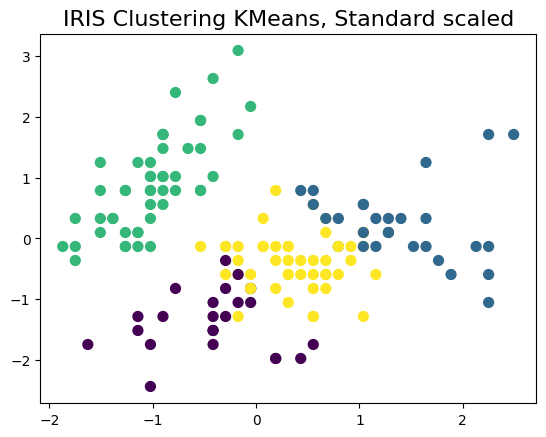

In [ ]:
plt.scatter(X_S[:,0],X_S[:,1], c=clusters_S, s=50, cmap='viridis')

plt.title('IRIS Clustering KMeans, Standard scaled', fontsize=16)

Text(0.5, 1.0, 'IRIS Clustering KMeans, MinMax scaled')

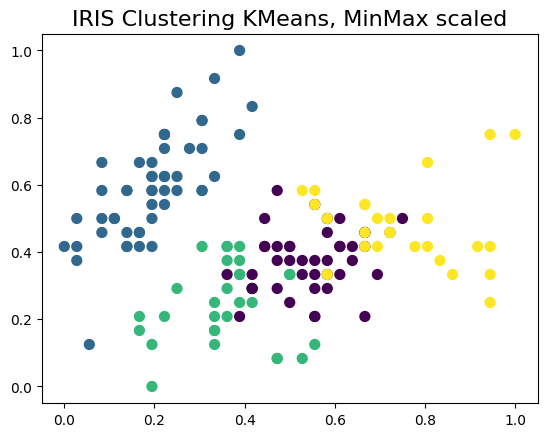

In [ ]:
plt.scatter(X_M[:,0],X_M[:,1], c=clusters_M, s=50, cmap='viridis')

plt.title('IRIS Clustering KMeans, MinMax scaled', fontsize=16)


In [ ]:
model.fit(X_M).inertia_

5.516933472040375

# Agglomerative Clustering

**Agglomerative clustering** refers to a collection of clustering algorithms that all build upon the same principles: the algorithm starts by declaring each point its own cluster, and then merges the two most similar clusters until some stopping criterion is satisfied. The stopping criterion implemented in `scikit-learn` is the number of clusters, so similar clusters are merged until only the specified number of clusters are left. There are several linkage criteria that specify how exactly the "most similar cluster" is measured. This measure is always defined between two existing clusters.
The following three choices are implemented in scikit-learn:
* *ward*: The default choice, ward picks the two clusters to merge such that the variance
within all clusters increases the least. This often leads to clusters that are relatively
equally sized.
* *average*: Average linkage merges the two clusters that have the smallest average distance
between all their points.
* *complete*: Complete linkage (also known as maximum linkage) merges the two clusters that
have the smallest maximum distance between their points.

*ward* works on most datasets, and we will use it in our examples. If the clusters have very dissimilar numbers of members (if one is much bigger than all the others, for example), *average* or *complete* might work better. The following are some commonly used cluster distances, and their respective expressions:

![](images/cluster-distances.png)


The following figure illustrates the progression of agglomerative clustering on a two-dimensional dataset, looking for three clusters:

![](images/agglomerative-steps.png)

Initially, each point is its own cluster. Then, in each step, the two clusters that are closest are merged. In the first four steps, two single-point clusters are picked and these are joined into two-point clusters. In step 5, one of the two-point clusters is extended to a third point, and so on. In step 9, there are only three clusters remaining. As we specified that we are looking for three clusters, the algorithm then stops. Let's have a look at how agglomerative clustering performs on the simple three cluster data we used here. Because of the way the algorithm works, **agglomerative clustering cannot make predictions for new data points**. Therefore, `AgglomerativeClustering` has no `predict` method. To build the model and get the cluster memberships on the training set, **use the `fit_predict` method** instead.

Text(0, 0.5, 'Feature 1')

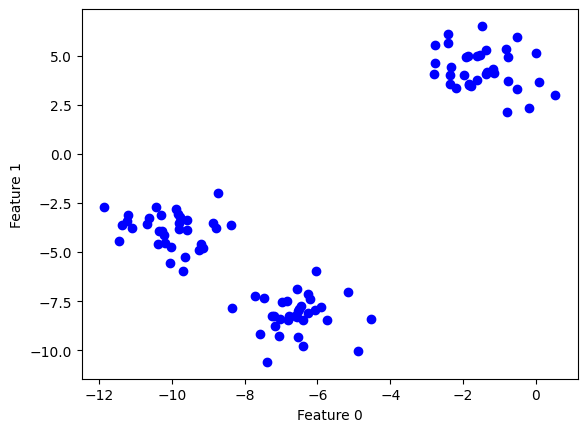

In [ ]:
X, y = make_blobs(random_state=1)

plt.scatter(X[:, 0], X[:, 1], c='blue')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

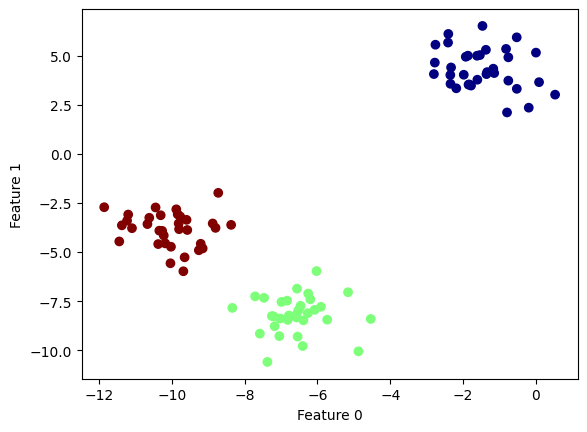

In [ ]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=assignment, cmap='jet')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

As expected, we get the same results here with such a simple dataset. While the `scikit-learn`
implementation of agglomerative clustering requires you to specify the number of
clusters you want the algorithm to find, agglomerative clustering methods provide
some help with choosing the right number, which we will come to next.

### Hierarchical clustering and dendrogram

Agglomerative clustering produces what is known as a *hierarchical clustering*. The clustering proceeds iteratively, and every point makes a journey from being a single point cluster to belonging to some final cluster. Each intermediate step provides a
clustering of the data (with a different number of clusters). The figure below shows an example of some data points which have been clustered in a hierarchical way, providing some insight into how each cluster breaks up into smaller clusters:
<img src="images/hierarchical-clusters.png" width="400" />

Visualizing this way is somewhat limited to only 2-D data. There is another way to visualize hierarchical clustering, called a *dendrogram*, that can handle multi-dimensional datasets. A **dendrogram** is a visualization in form of a tree showing the order and distances of merges during the hierarchical clustering.

`scikit-learn` does not have the functionality to draw the dendrogram, but we can go to the SciPy library to generate it. Clustering algorithms in SciPy are slightly different in terms of usage. SciPy provides a function that takes a data array X and computes a *linkage array*, which encodes hierarchical cluster similarities. We can then feed this linkage array into the SciPy `dendrogram` function to plot the dendrogram.

In [ ]:
from scipy.cluster.hierarchy import ward    #single, complete, average, weighted, centroid, median

X, y = make_blobs(random_state=0, n_samples=12)

# ward function returns an array that specifies the distances between clusters
linkage_array = ward(X)
print(linkage_array)

[[ 1.          4.          0.3320945   2.        ]
 [ 6.          9.          0.64580193  2.        ]
 [ 2.          8.          0.92683223  2.        ]
 [ 0.         11.          1.1803787   2.        ]
 [ 5.         15.          1.30311575  3.        ]
 [ 7.         13.          1.4440339   3.        ]
 [ 3.         14.          1.60041812  3.        ]
 [12.         18.          2.07815795  5.        ]
 [10.         17.          2.15981886  4.        ]
 [16.         20.          6.55024854  7.        ]
 [19.         21.          7.92446877 12.        ]]


In [ ]:
print(linkage_array[0])   # the first iteration

[1.        4.        0.3320945 2.       ]


In [ ]:
print(linkage_array[:10])   # the first 10 iterations

[[ 1.          4.          0.3320945   2.        ]
 [ 6.          9.          0.64580193  2.        ]
 [ 2.          8.          0.92683223  2.        ]
 [ 0.         11.          1.1803787   2.        ]
 [ 5.         15.          1.30311575  3.        ]
 [ 7.         13.          1.4440339   3.        ]
 [ 3.         14.          1.60041812  3.        ]
 [12.         18.          2.07815795  5.        ]
 [10.         17.          2.15981886  4.        ]
 [16.         20.          6.55024854  7.        ]]


We can observe that until iteration 4 the algorithm only directly merged original samples. We can also observe the monotonic increase of the distance.


In iteration 4 the algorithm decided to merge cluster indices 5 with 15.
**Q:** What is index 15?

In [ ]:
print(linkage_array[-4:,2])

[2.07815795 2.15981886 6.55024854 7.92446877]


Such distance jumps / gaps in the linkage_array are pretty interesting for us. They indicate that maybe the things that were merged here really don't belong to the same cluster.

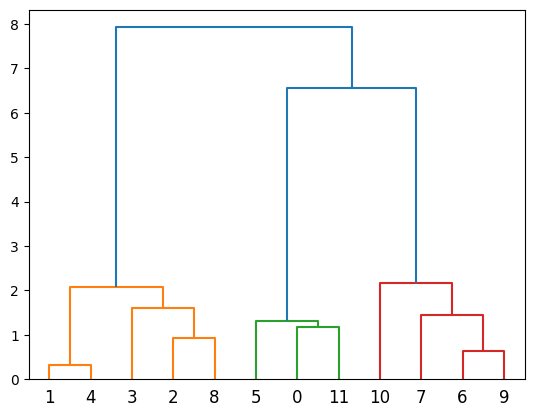

In [ ]:
# plot the dendrogram
from scipy.cluster.hierarchy import dendrogram

dendrogram(linkage_array)
plt.show()

The dendrogram shows data points as points on the bottom (numbered from 0 to 11). Then, a tree is plotted with these points (representing single-point clusters) as the leaves, and a new parent node is added for each two clusters that are joined. At the top level, there are two branches, one consisting of points 5, 0, 11, 10, 7, 6, and 9, and the other consisting of points 1, 4, 3, 2, and 8. These correspond to the two largest clusters.

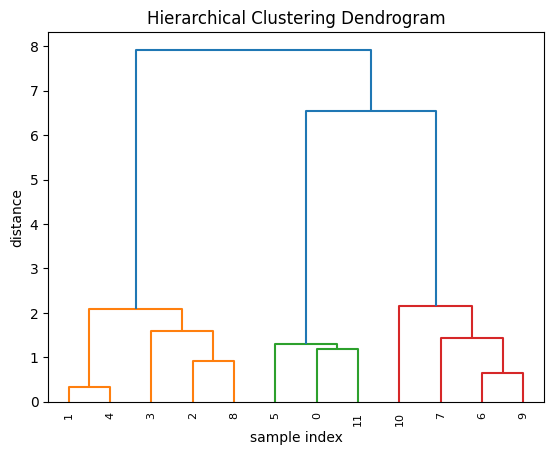

In [ ]:
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')

dendrogram(
    linkage_array,
    leaf_rotation=90,  # rotates the x axis labels
    leaf_font_size=8,  # font size for the x axis labels
)
plt.show()

(150, 2)


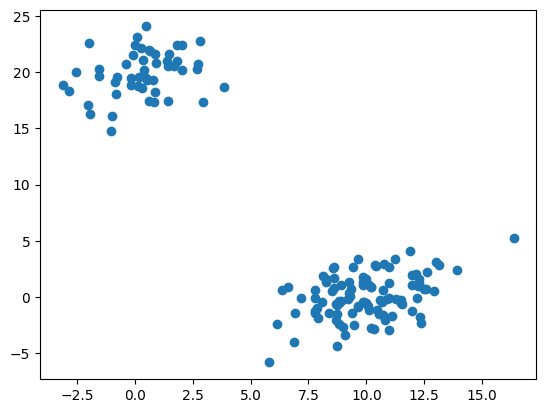

In [ ]:
# generate two clusters: a with 100 points, b with 50:
np.random.seed(4711)  # for repeatability of this tutorial
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
X1 = np.concatenate((a, b),)

print(X1.shape)

plt.scatter(X1[:,0], X1[:,1])
plt.show()

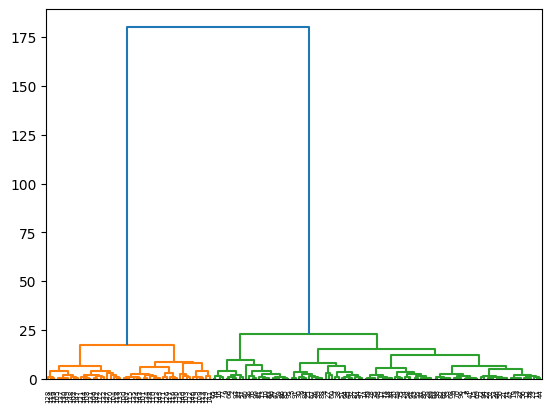

In [ ]:
Z1 = ward(X1)
dendrogram(Z1)
plt.show()

#### Dendrogram Truncation

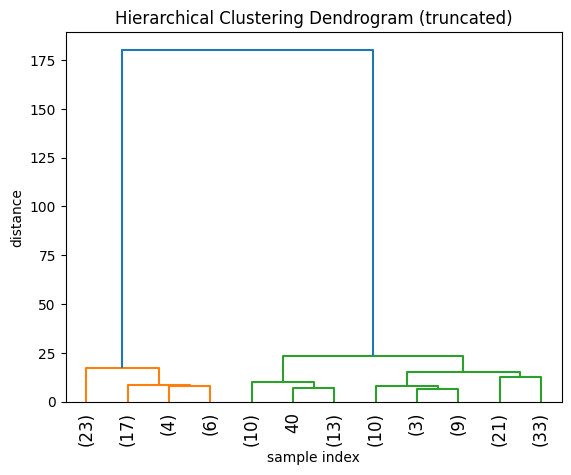

In [ ]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')

dendrogram(
    Z1,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,                   # p is the number of last clusters merged
    leaf_rotation=0,
    leaf_font_size=12)

plt.show()

The above shows a truncated dendrogram, which only shows the last p=12 out of our 149 merges.

### Interpreting the dendrogram further

The y-axis in the dendrogram doesn't just specify when in the agglomerative algorithm two clusters get merged. The length of each branch also shows how far apart the merged clusters are.

## <font color=Green><b>Exercise 2:</b></font>
For the following dataset use hierarchical clustering and compare the dendrograms for different linkage types.

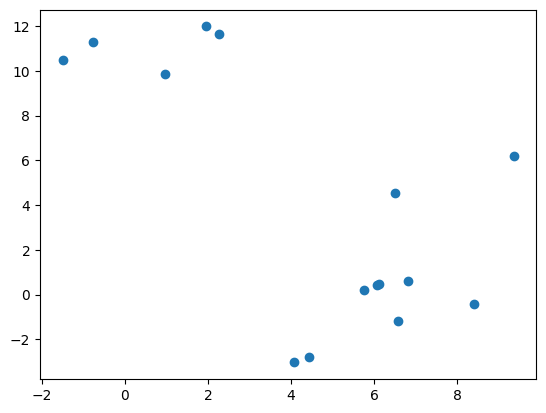

In [ ]:
np.random.seed(4711)  # for repeatability of this tutorial
a = np.random.multivariate_normal([5, 0], [[3, 2], [1, 4]], size=[10,])
b = np.random.multivariate_normal([0, 10], [[3, 1], [1, 4]], size=[5,])
X2 = np.concatenate((a, b),)

plt.scatter(X2[:,0], X2[:,1])
plt.show()

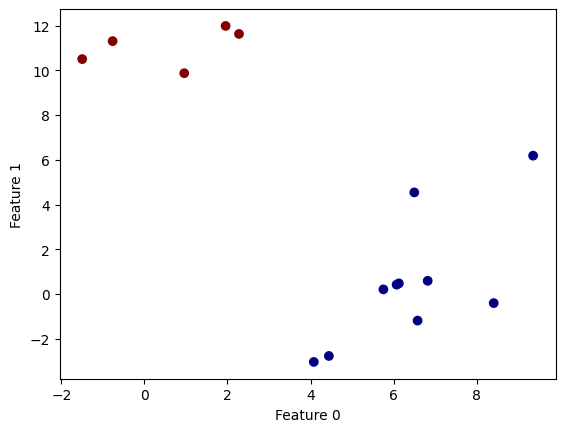

In [ ]:
# your code here
aggC = AgglomerativeClustering(n_clusters =2, linkage='complete')

assignment = aggC.fit_predict(X2)

plt.scatter(X2[:,0],X2[:,1], c= assignment, cmap='jet')

plt.xlabel('Feature 0')

plt.ylabel('Feature 1')

plt.show()

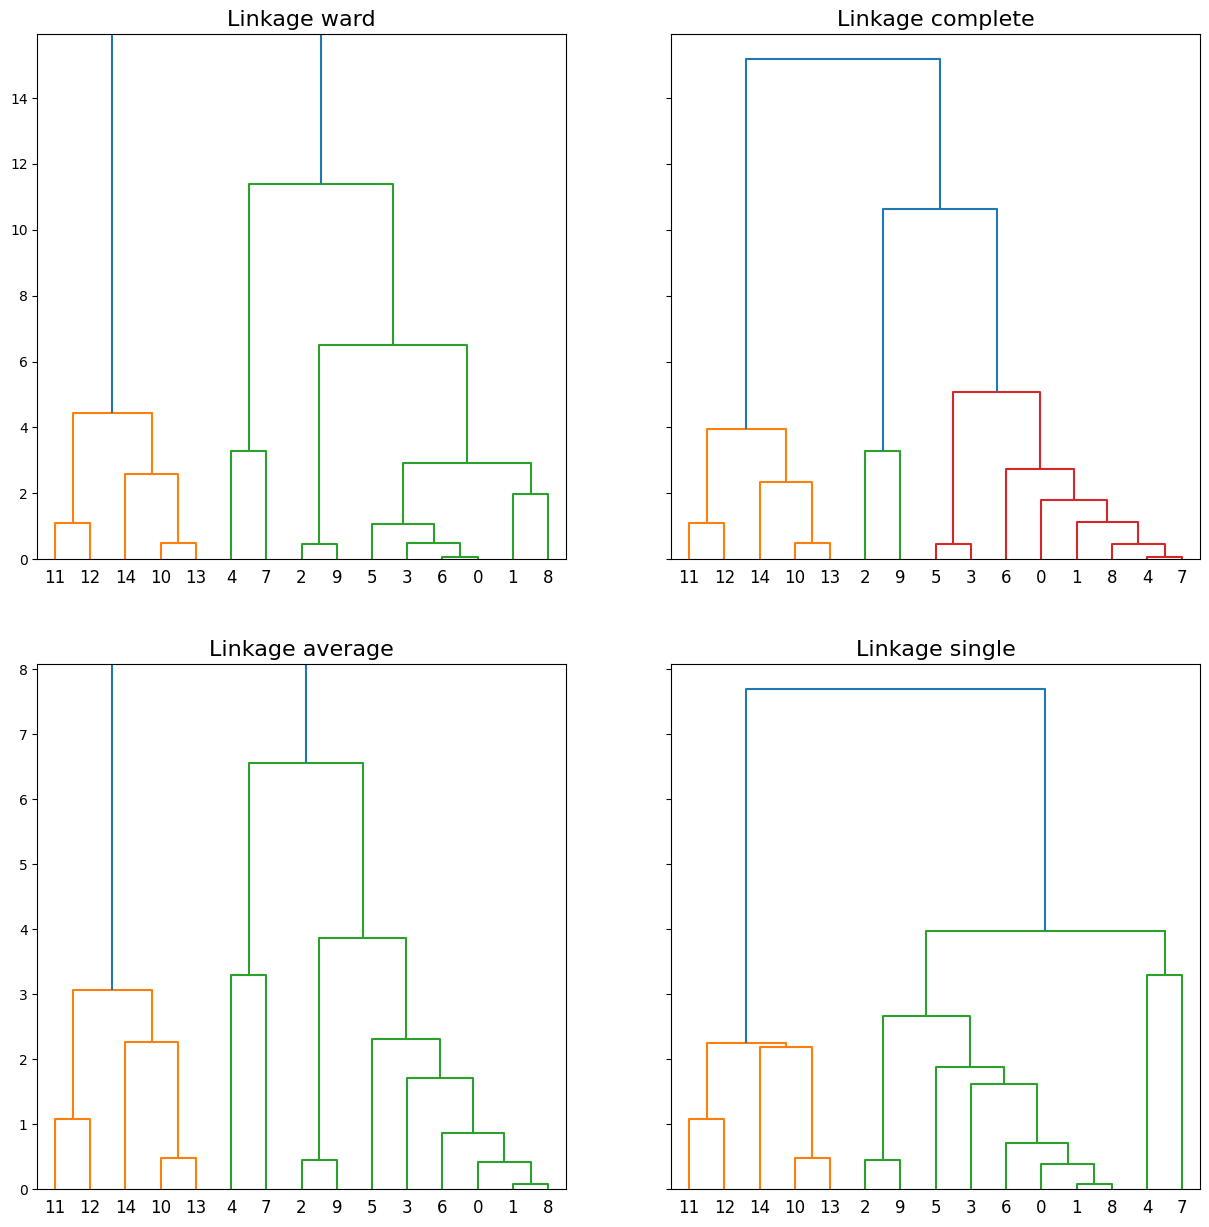

In [ ]:
from scipy.cluster.hierarchy import ward, complete, average, single

fig, ax = plt.subplots(2,2,sharex='col', sharey='row', figsize=(15,15))
link =[ward, complete, average, single]
for l in link:
    Z1 = l(X2)
    plt.subplot(2,2,link.index(l)+1)
    t='Linkage '+l.__name__
    plt.title(t,fontsize=16)
    dendrogram(Z1)

### Cophenetic Correlation Coefficient

One thing we can do to check if our choice of distance metric is good is to check the Cophenetic Correlation Coefficient of your clustering with help of the `cophenet()` function. This compares the actual pairwise distances of all your samples to those implied by the hierarchical clustering. **The closer the value is to 1, the better the clustering** preserves the original distances.

In [ ]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

# pdist function returns a distance matrix representing distance of all sample pairs
c, coph_dists = cophenet(linkage_array, pdist(X))
print(c)

0.8121412861495917


In [ ]:
from scipy.cluster.hierarchy import single, complete, average

Z = single(X)
c, coph_dists = cophenet(Z, pdist(X))
print(c)

Z = complete(X)
c, coph_dists = cophenet(Z, pdist(X))
print(c)

Z = average(X)
c, coph_dists = cophenet(Z, pdist(X))
print(c)

0.7898426162175275
0.8426771662540814
0.8452151291186623


So, average linkage may be a slightly better option compared the the ward linkage.

## <font color=Green><b>Exercise 3:</b></font>
Cluster the following dataset using hierarchical clustering with linkage: {ward, complete, average, single}

In [ ]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

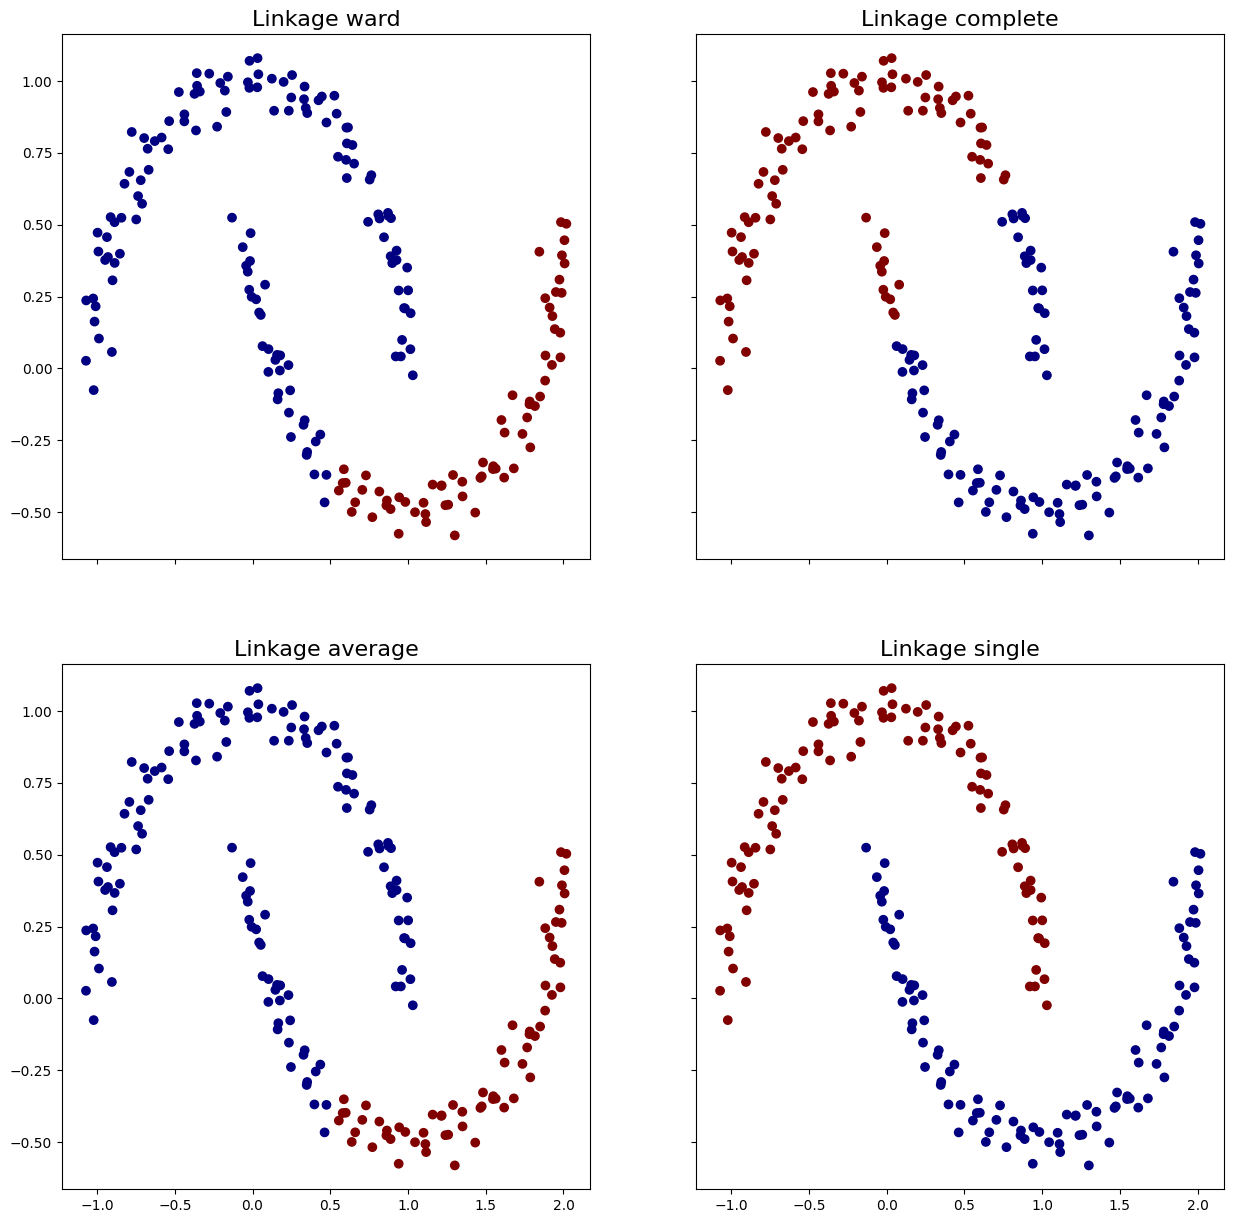

In [ ]:
# your code here
from scipy.cluster.hierarchy import ward, complete, average, single

fig, ax = plt.subplots(2,2,sharex='col', sharey='row', figsize=(15,15))
link =['ward', 'complete', 'average', 'single']
for l in link:
    agg = AgglomerativeClustering(n_clusters=2, linkage=l)
    assignment = agg.fit_predict(X)
    plt.subplot(2,2,link.index(l)+1)
    plt.scatter(X[:,0],X[:,1], c= assignment, cmap='jet')
    t='Linkage '+l
    plt.title(t,fontsize=16)

## <font color=Green><b>Exercise 4:</b></font>
We have investigated Failure cases of k-means in 3 examples. Apply Agglomerative clustering for the data have been used in those examples and see if the resulting clustering is a success.

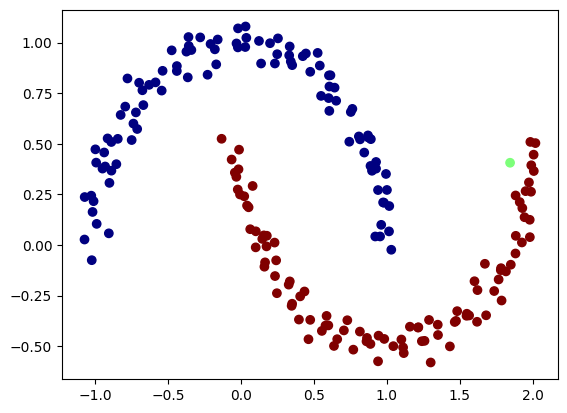

In [ ]:
# Your code here
agg = AgglomerativeClustering(n_clusters=3, linkage='single')
assignment = agg.fit_predict(X)
plt.scatter(X[:,0],X[:,1], c= assignment, cmap='jet')
plt.show()

# Density-Based Spatial Clustering of Applications with Noise (DBSCAN)

Another very useful clustering algorithm is **DBSCAN** (which stands for "density based
spatial clustering of applications with noise"). The main benefits of DBSCAN are that it does not require the user to set the number of clusters a priori, it can capture clusters of complex shapes, and it can identify points that are not part of any
cluster. DBSCAN is somewhat slower than agglomerative clustering and k-means, but still scales to relatively large datasets.

DBSCAN works by identifying points that are in "crowded" regions of the feature space, where many data points are close together. These regions are referred to as dense regions in feature space. The idea behind DBSCAN is that clusters form dense
regions of data, separated by regions that are relatively empty.

Points that are within a dense region are called core samples (or core points). There are two parameters in DBSCAN: `min_samples` and `eps`. If there are at least `min_samples` number of data points within a distance of `eps` to a given
data point, that data point is classified as a core sample. Core samples that are closer to each other than the distance eps are put into the same cluster by DBSCAN.

### How does this work?

The algorithm works by picking an arbitrary point to start with. It then finds all points with distance `eps` or less from that point. If there are less than `min_samples` points within distance `eps` of the starting point, this point is labeled as "noise", meaning that it doesn't belong to any cluster. If there are more than `min_samples` points within a distance of `eps`, the point is labeled a "core sample" and assigned a new cluster label. Then, all neighbors (within `eps`) of the point are visited. If they have not been assigned a cluster yet, they are assigned the new cluster label that was just created. If
they are core samples, their neighbors are visited in turn, and so on. The cluster
grows until there are no more core samples within distance `eps` of the cluster. Then another point that hasn't yet been visited is picked, and the same procedure is repeated.

Concisely, in DBSCAN, a special label is assigned to each sample (point) using the following criteria:
 - **Core Sample:** A point is considered as *core sample* if at least a specified number (`min_samples`) of neighboring points fall within the specified radius `eps`.
 - **Boundary Point**: It is a point that has fewer neighbors than `min_samples` within `eps`, but lies within the `eps` radius of a core point. Means that the boundary point itself doesn't meet the `min_samples` criteria.
 - **Noise**: All other points that are neither core nor border points are considered as *noise* points.

 ![(image)](images/dbscan.png)

DBSCAN does not allow predictions on new test data, so we need to `fit_predict` at the same time to perform clustering and return the cluster labels in one step:

Text(0, 0.5, 'Feature 2')

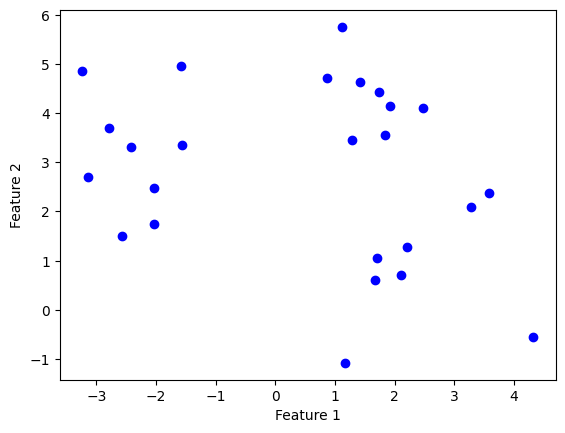

In [ ]:
X, y = make_blobs(random_state=0, n_samples=25)

plt.scatter(X[:,0], X[:,1], c="blue")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN()
print(dbscan)
clusters = dbscan.fit_predict(X)
print("Cluster memberships:\n{}".format(clusters))

DBSCAN()
Cluster memberships:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1]


Opps! As you can see, all data points were assigned the label -1, which stands for noise. This is a consequence of the default parameter settings for eps and min_samples, which are not tuned for small toy datasets. Let's try other combination of settings then...

In [ ]:
for ms in list([2, 3, 5]):
    for e in list([1, 1.5, 2, 3]):
        dbscan = DBSCAN(min_samples=ms, eps=e)
        clusters = dbscan.fit_predict(X)
        print("min samples: ", ms, " eps: ", e, " clusters: ", clusters)

min samples:  2  eps:  1  clusters:  [ 0  1  0  0  1  2 -1  0  0  3  3  1  1  0  1  1 -1  2  3  0 -1  1 -1  3
 -1]
min samples:  2  eps:  1.5  clusters:  [ 0  1  0  0  1  2  1  0  0  2  2  1  1  0  1  1  0  2  2  0 -1  1 -1  2
 -1]
min samples:  2  eps:  2  clusters:  [ 0  1  0  0  1  2  1  0  0  2  2  1  1  0  1  1  0  2  2  0 -1  1  1  2
  2]
min samples:  2  eps:  3  clusters:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
min samples:  3  eps:  1  clusters:  [ 0  1  0  0  1 -1 -1  0  0  2  2  1  1  0  1  1 -1 -1  2  0 -1  1 -1  2
 -1]
min samples:  3  eps:  1.5  clusters:  [ 0  1  0  0  1  2  1  0  0  2  2  1  1  0  1  1  0  2  2  0 -1  1 -1  2
 -1]
min samples:  3  eps:  2  clusters:  [ 0  1  0  0  1  2  1  0  0  2  2  1  1  0  1  1  0  2  2  0 -1  1  1  2
  2]
min samples:  3  eps:  3  clusters:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
min samples:  5  eps:  1  clusters:  [ 0  1  0  0  1 -1 -1  0  0 -1 -1  1 -1  0 -1  1 -1 -1 -1  0 -1  1 -1 -1
 -1]
min samples: 

Let's take a closer look at some of these settings, particularly those that have clear cut clusters (cluster numbers 0, 1, 2), and those with some noise points.

`DBSCAN` comes with some nice properties. **`core_sample_indices_`** gets us the indices of the core samples, whereas noise samples can be found by the label -1, what remains are the boundary samples. Let's create a plot.

In [ ]:
#Let's determine which data points are considered to be core_points, boundray_points and noise points
ms = 5
ep = 2
dbscan = DBSCAN(min_samples=ms, eps=ep)
clusters = dbscan.fit_predict(X)
print(clusters)
print("===============================")

all_samples = np.arange(0,len(X))
print("All samples: ",all_samples)

core = dbscan.core_sample_indices_
print("Core samples: ", core)

noise = np.where(clusters == -1)[0]       # which data points have -1 label
print("Noise: ", noise)

boundary = np.setdiff1d(np.setdiff1d(all_samples, core), noise)
print("Boundary samples: ", boundary)

[ 0  1  0  0  1  2  1  0  0  2  2  1  1  0  1  1  0  2  2  0 -1  1  1  2
  2]
All samples:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]
Core samples:  [ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 18 19 21 22 23]
Noise:  [20]
Boundary samples:  [ 6 17 24]


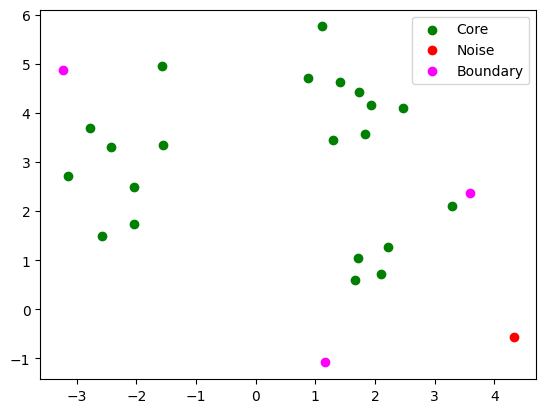

In [ ]:
# core_points, boundray_points and noise points
plt.scatter(X[core,0], X[core,1], c='g', label='Core')
plt.scatter(X[noise,0], X[noise,1], c='r', label='Noise')
plt.scatter(X[boundary,0], X[boundary,1], c='magenta', label='Boundary')
plt.legend()
plt.show()

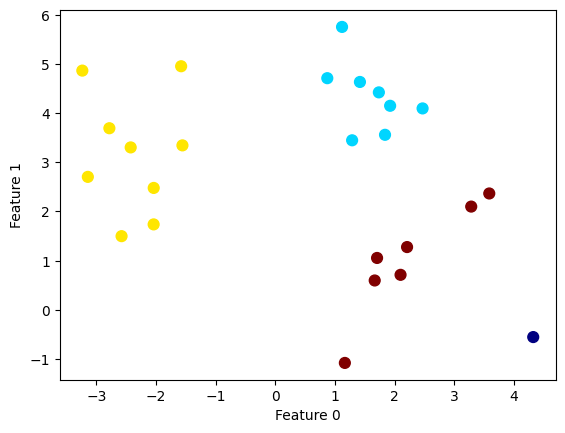

[ 0  1  0  0  1  2  1  0  0  2  2  1  1  0  1  1  0  2  2  0 -1  1  1  2
  2]


In [ ]:
# plot the cluster assignments
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='jet', s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

print(clusters)

AttributeError: Circle.set() got an unexpected keyword argument 'Fill'

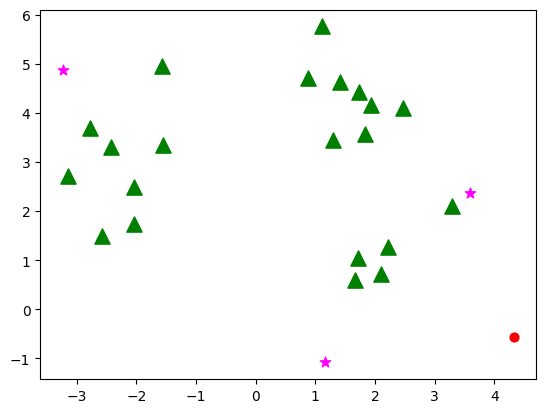

In [ ]:
# plot all three types of points
fig, ax = plt.subplots()
plt.scatter(X[boundary,0], X[boundary,1],
            c='magenta', cmap='viridis',
             marker='*', s=60)

plt.scatter(X[core,0], X[core,1],
            c='g', cmap='viridis',
             marker='^', s=120)

plt.scatter(X[noise,0], X[noise,1],
            c='red', cmap='viridis',
            marker='o', s=40)

# draw circles of radius eps around each core sample
for i in core:
    circle = plt.Circle((X[i, 0], X[i, 1]), ep, color='blue', Fill = False)
    ax.add_artist(circle)

plt.show()

**Tip**: While DBSCAN doesn’t require setting the number of clusters explicitly, setting `eps` implicitly controls how many clusters will be found. Finding a good setting for `eps` is sometimes easier after scaling the data using `StandardScaler` or `MinMaxScaler` ([here](http://scikit-learn.org/stable/modules/preprocessing.html) is more information), as using these scaling techniques.

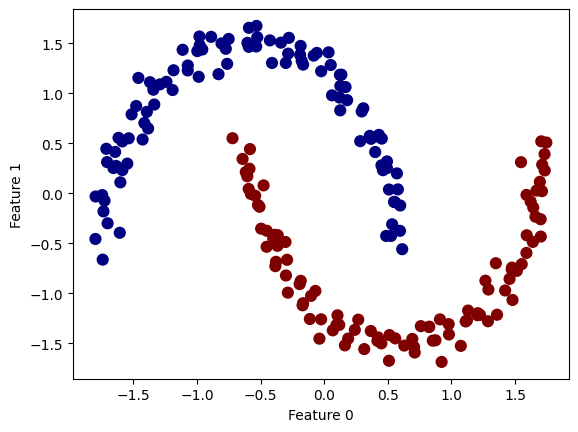

In [ ]:
from sklearn.preprocessing import StandardScaler

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)

# plot the cluster assignments
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='jet', s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

Perfect!

One of the main advantages of using DBSCAN is that it does not assume that the clusters have a spherical shape as in k-means. Furthermore, DBSCAN is different from k-means and hierarchical clustering in that it doesn't necessarily assign each point to a cluster but is capable of removing noise points if they fall too far from significant clusters.

# Comparing and Evaluating Clustering Algorithms

One of the challenges in applying clustering algorithms is that it is very hard to assess how well an algorithm worked, and to compare outcomes between different algorithms. After talking about the algorithms behind k-means, agglomerative clustering,
and DBSCAN, we will now compare them on some real-world datasets.

There are metrics that can be used to assess the outcome of a clustering algorithm with knowing and unknowing the true labels of our datapoints.

## Clustering Evaluation Metrics (True label known)

### Adjusted Rand Index
Adjusted Rand Index measures the similarity between `y_true` and `y_pred`.

To calculate similarity between two cluster assignments in `y_true` and `y_pred`, this metric calculates:
   - **a:** The number of pairs of elements that are in the same set in `y_true` and in the same set in `y_pred`
   - **b:** The number of pairs of elements that are in different sets in `y_true` and in different sets in `y_pred`

$$Rand_{Index}=RI=\frac{a+b}{{n\choose 2}}$$, where n = number of datapoints = length of `y_true` </br>

**Perfect labeling has RI = 1.0 and bad labeling has RI = 0.0.** </br>

Adjusted Rand Index, adjusts the Rand Index such that random assignment of the labels results in Adjusted_Rand_Index=0. Adjusted Rand Index is 1.0 for perfecr labeling and zero or negative for bad labeling.

In [ ]:
from sklearn.metrics import adjusted_rand_score

kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(digits.data)

adjusted_rand_score(digits.target, clusters)

0.725814218974996

In [ ]:
adjusted_rand_score([2, 2, 1, 3], [0, 0, 4, 5])

1.0

In [ ]:
adjusted_rand_score([2, 2, 1, 3], [0, 0, 4, 4])

0.5714285714285714

In [ ]:
adjusted_rand_score([2, 2, 3, 3], [0, 0, 0, 0])
# adjusted_rand_score([1, 2, 3, 4], [0, 0, 0, 0])
# adjusted_rand_score([1, 1, 1, 3], [0, 0, 0, 0])

0.0

### v_measure
To evaluate the goodness of the clustering v_measure uses the following metrics:

   - **Homogeneity**: each cluster contains only members of a single class.
   - **Completeness**: all members of a given class are assigned to the same cluster.

Then v_measure is the harmonic mean of them. $$v_{measure}=2\times \frac{h \times c}{h + c}$$

The v_measure score is between 0 and 1 and 1 is for perfectly complete labeling.

In [ ]:
from sklearn.metrics import v_measure_score

v = v_measure_score(digits.target, clusters)
print('v_measure:',v)

v_measure: 0.7749970862895714


In [ ]:
from sklearn.metrics import homogeneity_score, completeness_score

h = homogeneity_score(digits.target, clusters)
print('homogeneity_score:', h)

c = completeness_score(digits.target, clusters)
print('completeness_score:', c)

v_manual = 2 * h * c / (h + c)
v == v_manual

homogeneity_score: 0.7734341694562783
completeness_score: 0.7765663324401426


True

In [ ]:
v_measure_score([0, 0, 1, 1], [1, 1, 0, 0])
# v_measure_score([2, 2, 1, 3], [0, 0, 4, 5])

1.0

In [ ]:
v_measure_score([2, 2, 1, 3], [0, 0, 4, 4])

0.7999999999999999

In [ ]:
v_measure_score([2, 2, 1, 3], [0, 1, 4, 4])

0.6666666666666666

In [ ]:
v_measure_score([2, 2, 3, 3], [0, 0, 0, 0])

0.0

## Clustering Evaluation Metrics (True label unknown)

In the above example, we could use the confusion metrix or accuracy because we knew the true digit in each image however, clustering is an unsupervised algorithm that clusters (labels) datapoints only based on their features without knowing the real labeles of them. To evaluate the *goodness* of the resulting clusters, we need clustering evaluation metrics.

To evaluate the goodness of a clustering model or comparing the performance of variuos clustering algorithms we need to evaluate the resulting clusters. Basically, a good clustering algorithm generates clusters with high intracluster homogeneity and good inter-cluster separation.

### Silhouette Coefficient
Silhouette Coefficient evaluates how similar an object is to its own cluster (*cohesion*) compared to other clusters (*separation*).

    - a: The mean distance between a sample and all other points in its cluster (*cohesion*).
    - b: The mean distance between a sample and all other points in the next nearest cluster (*separation*).

Silhouette Coefficient = $\frac{b-a}{max(a,b)}$

    - This score is bounded between -1 and +1.
    - For highly-dense well-separated clusters a is close to zero and b is positive, therefore s is close to +1.
    - For incorrect clustering s is close to -1.
    - Scores around zero indicate overlapping clusters.
    
**Attention**: We mainly use Silhouette Coefficien to find the best number of the clusters similar to the elbow method.



In [ ]:
from sklearn.metrics import silhouette_score

s = silhouette_score(digits.data, clusters, metric = 'euclidean')
print('silhouette_score:', s)

silhouette_score: 0.1764738746996612


### Davies-Bouldin Index
Davies-Bouldin Index method evaluates the average similarity between each cluster $C_i$ for $i=1, 2, \dots, k$ and its most similar one $C_j$.
 - $s_i$: the average distance between each point of cluster i and the centroid of that cluster – also know as cluster diameter.
 - $d_{ij}$:the distance between cluster centroids $C_i$ and $C_j$.
 $$R_{ij}=\frac{s_i+s_j}{d_ij}$$

 Davies-Bouldin index= DB=$\frac{1}{k} \sum_{i=1}^{k} {max(R_{ij})}$

 **Attention:** For good clustering, this value is close to zero.

In [ ]:
from sklearn.metrics import davies_bouldin_score

db = davies_bouldin_score(digits.data, clusters)
print('davies_bouldin_score: ', db)

davies_bouldin_score:  2.0453949780536558


## Summary

This section has shown that applying and evaluating clustering is a highly qualitative
procedure, and often most helpful in the exploratory phase of data analysis. We
looked at three clustering algorithms: **k-means, DBSCAN,** and **agglomerative clustering**.
All three have a way of controlling the granularity of clustering. k-means and
agglomerative clustering allow you to specify the number of desired clusters, while
DBSCAN lets you define proximity using the eps parameter, which indirectly influences
cluster size. All three methods can be used on large, real-world datasets, are relatively
easy to understand, and allow for clustering into many clusters.

Strengths of each of these algorithms:
* **k-means**: allows characterization of clusters using cluster means (top-down). It can also be viewed as a decomposition method by way of vector quantization.
* **agglomerative**: provides whole hierarchy of possible partitions of the data (bottom-up), which can be inspected via dendrograms
* **DBSCAN**: allows for detection of outlier points that are not part of any cluster, and it can help determine automatically the number of clusters. It also allows for more complex shapes (just like the `two_moons` data) to be clustered correctly.

## <font color=Green><b>Exercise 5:</b></font>
For the given data, build K-means and Agglomerative clustering models.
Using the Elbow method find the best number of clusters, evaluate them and then compare the results for selecting the best one.

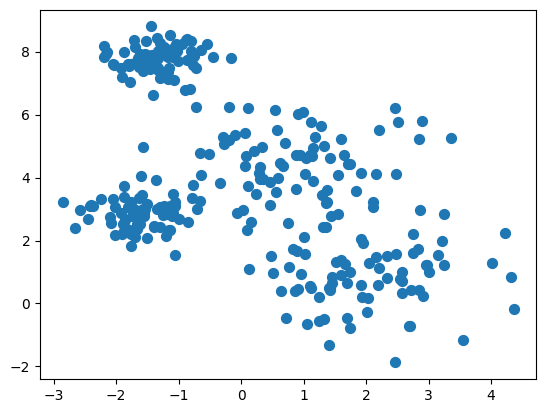

In [ ]:
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=[1, 1, 0.5, 0.4], random_state=0)

plt.scatter(X[:, 0], X[:, 1], s=50)

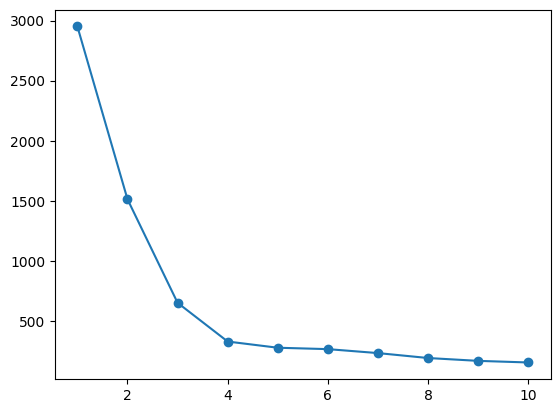

In [ ]:
distortions = []

for i in range(1,11):

    kmeans = KMeans(n_clusters=i, random_state=0)

    kmeans.fit(X)

    distortions.append(kmeans.inertia_)

plt.plot(range(1,11), distortions, marker='o')

plt.show()

In [ ]:
s = silhouette_score(X, kmeans.fit_predict(X))

print('Silhoutte Score:',s)

agglo = AgglomerativeClustering(n_clusters=4, linkage='ward')

print('Silhoutte Score:',silhouette_score(X,agglo.fit_predict(X)))

Silhoutte Score: 0.4126071587767771
Silhoutte Score: 0.6011188256954497


## <font color=Green><b>Exercise 6:</b></font>
For the given data, Using the DBSCAN method, build a model and find the best values for min-sample and eps arguments.

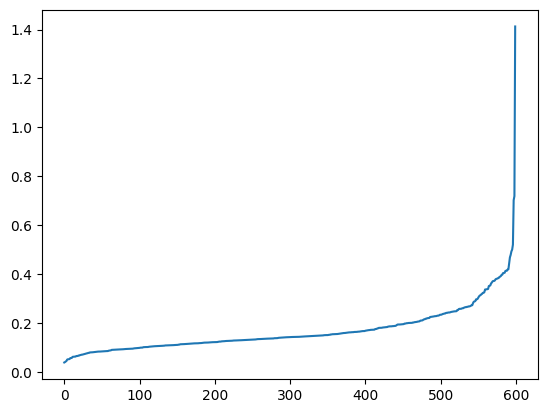

In [ ]:
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

# Your code here
from sklearn.neighbors import NearestNeighbors
k = 5
nbrs = NearestNeighbors(n_neighbors=k).fit(X)
distances, _ = nbrs.kneighbors(X)
k_distances = np.sort(distances[:,k-1])
plt.plot(k_distances)
plt.show()

In [ ]:
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)
print('DBSCAN Silhouette Score:',silhouette_score(X, dbscan_labels))

DBSCAN Silhouette Score: 0.30220567791124153


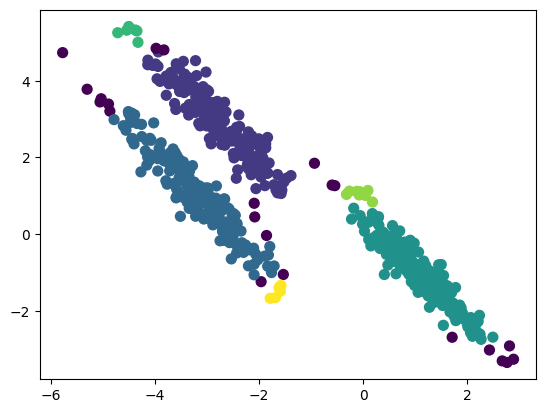

In [ ]:
plt.scatter(X[:,0],X[:,1], c=dbscan_labels, cmap='viridis', s=50)
plt.show()

## <font color=Green><b>Exercise 7:</b></font>
Cluster iris dataset using hierarchical clustering with linkage: {ward, complete, average, single}

In [ ]:
# get Iris

iris = datasets.load_iris()
X = iris.data
y = iris.target

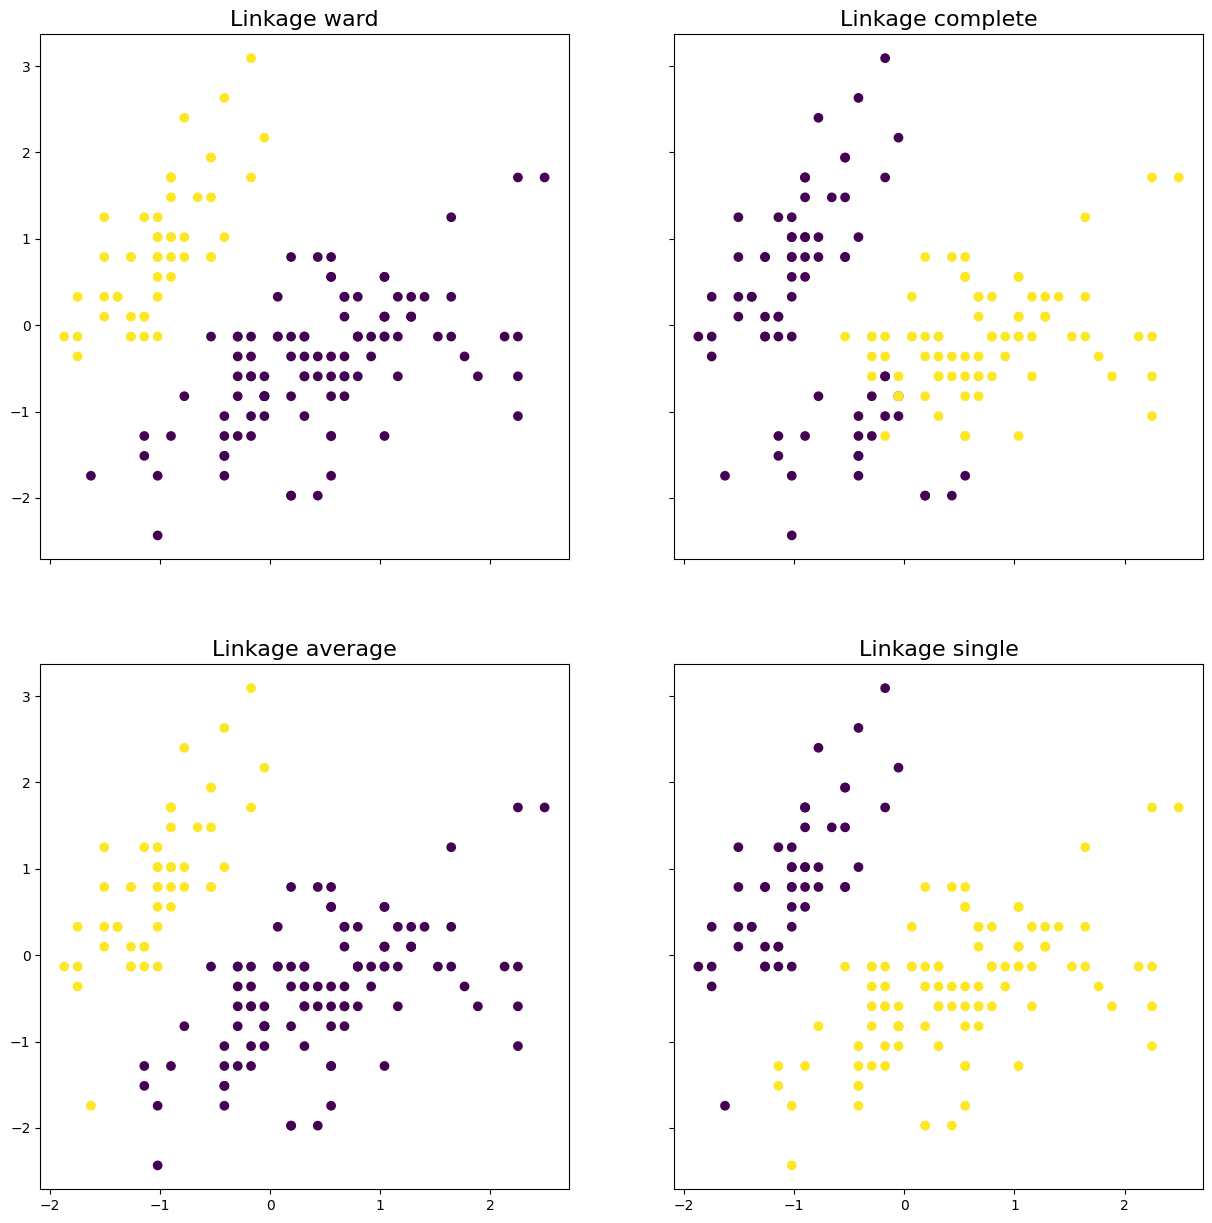

In [ ]:
# Scaling data
X_S = StandardScaler().fit_transform(X)
X_M = MinMaxScaler(feature_range=(0,1)).fit_transform(X)
# Your code here

fig, ax = plt.subplots(2,2,sharex='col', sharey='row', figsize=(15,15))
link =['ward', 'complete', 'average', 'single']
for l in link:
    agg = AgglomerativeClustering(n_clusters=2, linkage=l)
    assignment = agg.fit_predict(X_S)
    plt.subplot(2,2,link.index(l)+1)
    plt.scatter(X_S[:,0],X_S[:,1], c= assignment, cmap='viridis')
    t='Linkage '+l
    plt.title(t,fontsize=16)

In [ ]:
# Your code here